In [149]:
from flirpy.camera.lepton import Lepton
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

[[29997 29970 29979 ... 30042 30030 30030]
 [29979 29972 29979 ... 30019 29997 29997]
 [29975 29983 29989 ... 29997 30003 30013]
 ...
 [29873 29869 29855 ... 30024 29931 29896]
 [29884 29855 29861 ... 30001 29937 29911]
 [29861 29855 29867 ... 29997 29935 29913]]


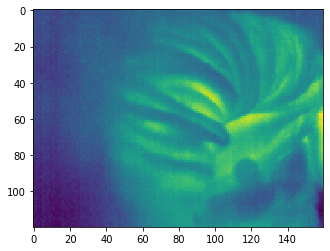

In [3]:
#single capture

camera = Lepton()

img = camera.grab()
print(camera)
print(img)
plt.imshow(img, interpolation='nearest')
plt.show()

camera.close()

In [ ]:
# doesn't work to place image id in camera grab function!
camera = Lepton()

img = camera.grab(1)
print(camera)
print(img)
plt.imshow(img, interpolation='nearest')
plt.show()

camera.close()

0


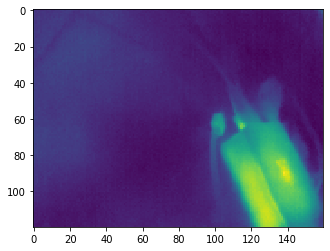

In [87]:
#pseudo-sync capture using a for loop, one camera
camList = np.array([0])
for i in camList:
    camera = Lepton(i)
    print(i)
    print(camera)

    img = camera.grab(i)
    #print(img)
    plt.imshow(img, interpolation='nearest')
    plt.show()
camera.close()    


0
<class 'numpy.ndarray'>


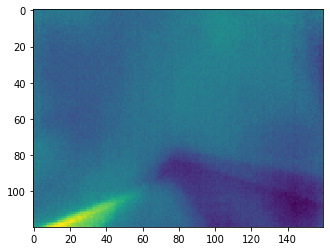

2
<class 'numpy.ndarray'>


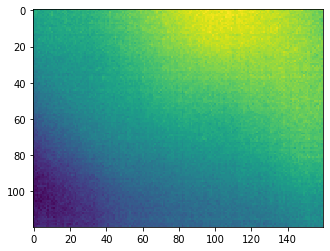

4
<class 'numpy.ndarray'>


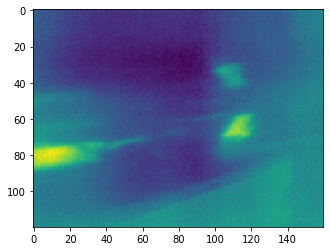

6
<class 'numpy.ndarray'>


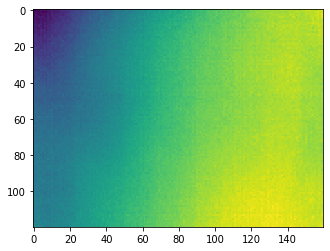

8
<class 'numpy.ndarray'>


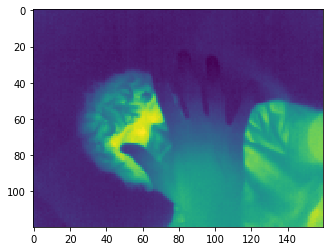

14
<class 'numpy.ndarray'>


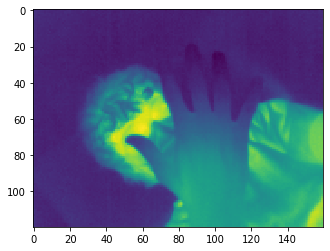

In [181]:
#MK 1: pseudo-sync capture using a for loop
# camera opening happens inside of loop 
camList = np.array([0,2,4,6,8,14])
for i in camList:
    camera = Lepton(i)
    print(i)
    print(camera)
    
    if i == 14:
        img = camera.grab()
        print(type(img))
        plt.imshow(img, interpolation='nearest')
        plt.show()
    else:
        img = camera.grab(i)
        print(type(img))
        plt.imshow(img, interpolation='nearest')
        plt.show()
camera.close()

#### 

Draft Two: placing the camera opening and closing outside the for loop to help with speed

In [ ]:
#MK 1.1.2: pseudo-sync capture using a for loop; not printing images in the loop
# need to figure out how to  
camList = np.array([0,2,4,6,8,14])



for i in camList:
    camera = Lepton(i)
    print(i)
    print(camera)
    #updates img, there's probably a better way to not loose image data
    img = camera.grab(i) #can I make a matrix w/ a defined number of columns but flexable row size???
    #write img to a file
    # investigate saving a numpy array to a tiff image file
    # maybe look at scipy.misc? or maybe astropy has something useful?
    # matplotlib has .image.imsave
camera.close()

In [ ]:
#MK 1.2: pseudo-sync with camera open and close outside of loop

#open the cameras. below are the ones that work for 
cameraOne = Lepton(0)
cameraTwo = Lepton(2)
cameraThree = Lepton(4)
cameraFour = Lepton(6)
cameraFive = Lepton(8)

for i in np.array([0,2,4,6,8]):
    #camera = Lepton(i)
    print(i)
    
    # the below should update the img array with new image data. would get really big really fast :(
    img = camera.grab(i) #will this adequitely run through the cameras?
    # maybe Lepton(i).grab(i) ?
    print(type(img))
    plt.imshow(img, interpolation='nearest')
    plt.show()

#close the cameras
cameraOne.close()
cameraTwo.close()
cameraThree.close()
cameraFour.close()
cameraFive.close()